# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import seaborn as sns
from pprint import pprint

# Import API key
from api_keys_adams import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [13]:
cities

['bredasdorp',
 'constitucion',
 'albany',
 'freeport',
 'hilo',
 'punta arenas',
 'bowen',
 'cidreira',
 'hobart',
 'tuktoyaktuk',
 'walvis bay',
 'lunenburg',
 'victoria',
 'vallenar',
 'vaini',
 'ilinsko-podomskoye',
 'saskylakh',
 'nikolskoye',
 'ponta do sol',
 'barrow',
 'lokoja',
 'buraydah',
 'cape town',
 'nuuk',
 'banjarmasin',
 'vila velha',
 'saint george',
 'butaritari',
 'boende',
 'rikitea',
 'kapaa',
 'ushuaia',
 'port hawkesbury',
 'torbay',
 'avarua',
 'marivan',
 'hermanus',
 'kahului',
 'chokurdakh',
 'jinchengjiang',
 'amderma',
 'vaitupu',
 'provideniya',
 'honiara',
 'inzhavino',
 'nadym',
 'bairiki',
 'busselton',
 'oranjestad',
 'opuwo',
 'sentyabrskiy',
 'solovetskiy',
 'sawtell',
 'kijang',
 'kuche',
 'inhambane',
 'arraial do cabo',
 'kavieng',
 'dikson',
 'bambous virieux',
 'bilma',
 'tuatapere',
 'luderitz',
 'mataura',
 'miri',
 'chicomuselo',
 'saldanha',
 'muhoroni',
 'agadez',
 'port elizabeth',
 'tilichiki',
 'chuy',
 'hualmay',
 'moerai',
 'hasaki',

In [14]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

In [15]:
city = "bredasdorp"
query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
weather_response = requests.get(query_url)
print(weather_response.status_code)
weather_json = weather_response.json()

200


In [16]:
pprint(weather_json)

{'base': 'stations',
 'clouds': {'all': 51},
 'cod': 200,
 'coord': {'lat': -34.5322, 'lon': 20.0403},
 'dt': 1644116957,
 'id': 1015776,
 'main': {'feels_like': 20.74,
          'grnd_level': 1003,
          'humidity': 96,
          'pressure': 1012,
          'sea_level': 1012,
          'temp': 20.16,
          'temp_max': 20.16,
          'temp_min': 20.16},
 'name': 'Bredasdorp',
 'sys': {'country': 'ZA',
         'id': 2006131,
         'sunrise': 1644120312,
         'sunset': 1644169359,
         'type': 2},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 78, 'gust': 3.8, 'speed': 2.89}}


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [17]:
city_name = weather_json["name"]
lat = weather_json["coord"]["lat"]
long = weather_json["coord"]["lon"]
cloud = weather_json["clouds"]["all"]
humid = weather_json["main"]["humidity"]
max_temp = weather_json["main"]["temp_max"]
wind = weather_json["wind"]["speed"]
country = weather_json["sys"]["country"]
dt = weather_json["dt"]

In [18]:
cloud

51

In [31]:
city_names=[]
lats=[]
longs=[]
clouds=[]
humids=[]
max_temps=[]
winds=[]
countries=[]
dts=[]

for city in cities:
    query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    weather_response = requests.get(query_url)
    #print(weather_response.status_code)
    
    if(weather_response.status_code == 200):
        weather_json = weather_response.json()
    
        city_name = weather_json["name"]
        lat = weather_json["coord"]["lat"]
        long = weather_json["coord"]["lon"]
        cloud = weather_json["clouds"]["all"]
        humid = weather_json["main"]["humidity"]
        max_temp = weather_json["main"]["temp_max"]
        wind = weather_json["wind"]["speed"]
        country = weather_json["sys"]["country"]
        dt = weather_json["dt"]
    
        city_names.append(city_name)
        lats.append(lat)
        longs.append(long)
        clouds.append(cloud)
        humids.append(humid)
        max_temps.append(max_temp)
        winds.append(wind)
        countries.append(country)
        dts.append(dt)
    
    time.sleep(1)

In [32]:
df = pd.DataFrame()

df["City"] = city_names
df["Country"] = countries
df["Date"] = dts
df["Lattitude"] = lats
df["Longitude"] = longs
df["Cloudiness"] = clouds
df["Humidity"] = humids
df["Max Temperature"] = max_temps
df["Wind Speed"] = winds

df.head()

,City,Country,Date,Lattitude,Longitude,Cloudiness,Humidity,Max Temperature,Wind Speed
0,Bredasdorp,ZA,1644118454,-34.5322,20.0403,64,95,20.16,2.36
1,Constitución,CL,1644118736,-35.3333,-72.4167,0,64,16.60,3.67
2,Albany,US,1644118738,42.6001,-73.9662,5,76,-12.03,2.02
3,Freeport,US,1644118457,40.6576,-73.5832,0,63,-5.55,0.89
4,Hilo,US,1644118740,19.7297,-155.0900,20,77,24.85,3.09


In [33]:
df.to_csv("my_weather_data.csv", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import seaborn as sns
from pprint import pprint


In [2]:
my_weather = "output_data/my_weather_data.csv"

weather_df = pd.read_csv(my_weather)

weather_df.head()

,City,Country,Date,Lattitude,Longitude,Cloudiness,Humidity,Max Temperature,Wind Speed
0,Bredasdorp,ZA,1644118454,-34.5322,20.0403,64,95,20.16,2.36
1,Constitución,CL,1644118736,-35.3333,-72.4167,0,64,16.60,3.67
2,Albany,US,1644118738,42.6001,-73.9662,5,76,-12.03,2.02
3,Freeport,US,1644118457,40.6576,-73.5832,0,63,-5.55,0.89
4,Hilo,US,1644118740,19.7297,-155.0900,20,77,24.85,3.09


In [4]:
#  Get the indices of cities that have humidity over 100%.
weather_df.describe()

,Date,Lattitude,Longitude,Cloudiness,Humidity,Max Temperature,Wind Speed
count,5.510000e+02,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000
mean,1.644119e+09,19.100371,21.290749,56.925590,73.034483,9.497169,3.608947
std,2.661245e+02,33.495567,90.414294,40.718277,20.322775,17.315427,2.862246
min,1.644118e+09,-54.800000,-179.166700,0.000000,8.000000,-37.260000,0.000000
25%,1.644119e+09,-8.840150,-58.903950,11.000000,63.000000,-1.815000,1.505000
50%,1.644119e+09,22.050000,25.570100,73.000000,76.000000,14.330000,2.760000
75%,1.644119e+09,47.693300,106.071350,100.000000,88.000000,23.445000,5.040000
max,1.644120e+09,78.218600,179.316700,100.000000,100.000000,35.910000,15.520000


In [5]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
mask = weather_df.Humidity <= 100
df_sub = weather_df.loc[mask].dropna().reset_index(drop=True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<function matplotlib.pyplot.show(close=None, block=None)>

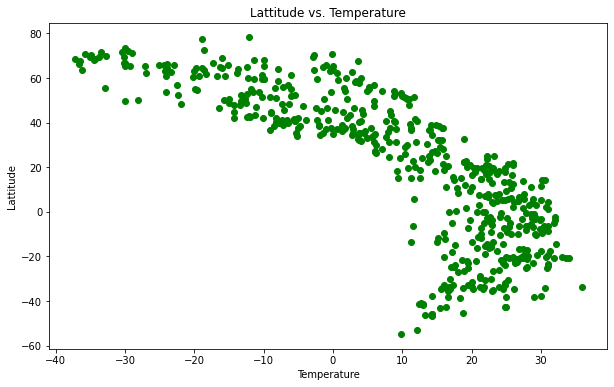

In [43]:

plt.figure(figsize=(10,6))
plt.scatter(weather_df["Max Temperature"], weather_df["Lattitude"], color= "green")
plt.xlabel("Temperature")
plt.ylabel("Lattitude")
plt.title("Lattitude vs. Temperature")
plt.show


Analysis- The closer a location is to the equater, the hotter the location. The farther from the location, the cooler the location. 

## Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(close=None, block=None)>

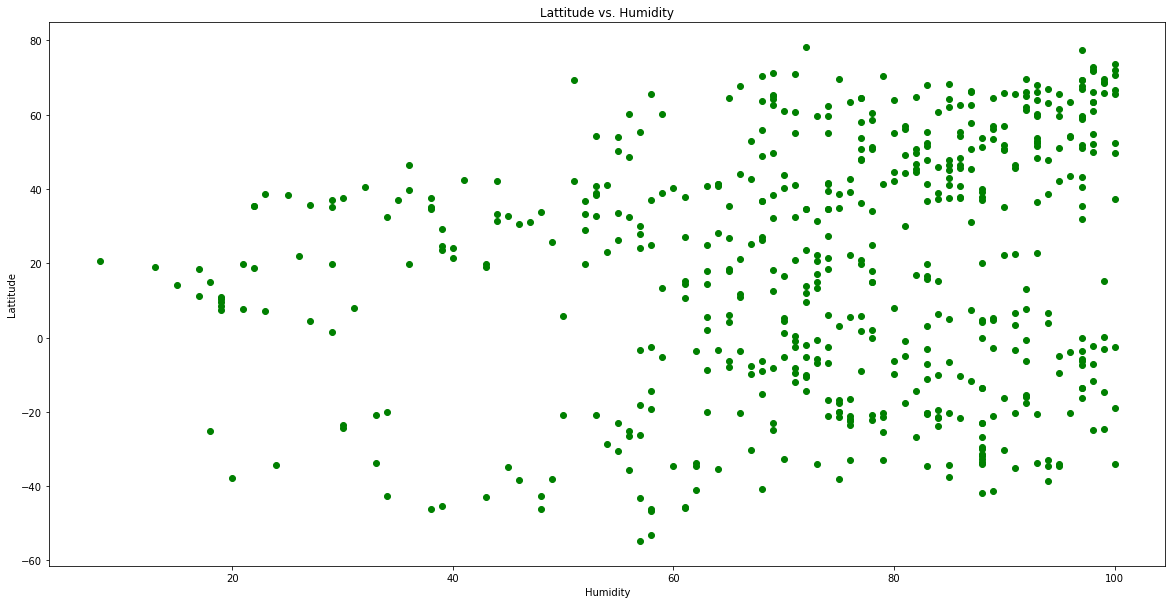

In [44]:

plt.figure(figsize=(20,10))
plt.scatter(weather_df["Humidity"], weather_df["Lattitude"], color= "green")
plt.xlabel("Humidity")
plt.ylabel("Lattitude")
plt.title("Lattitude vs. Humidity")
plt.show

Analysis- There is no correlation between lattitude and humidity. 

## Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(close=None, block=None)>

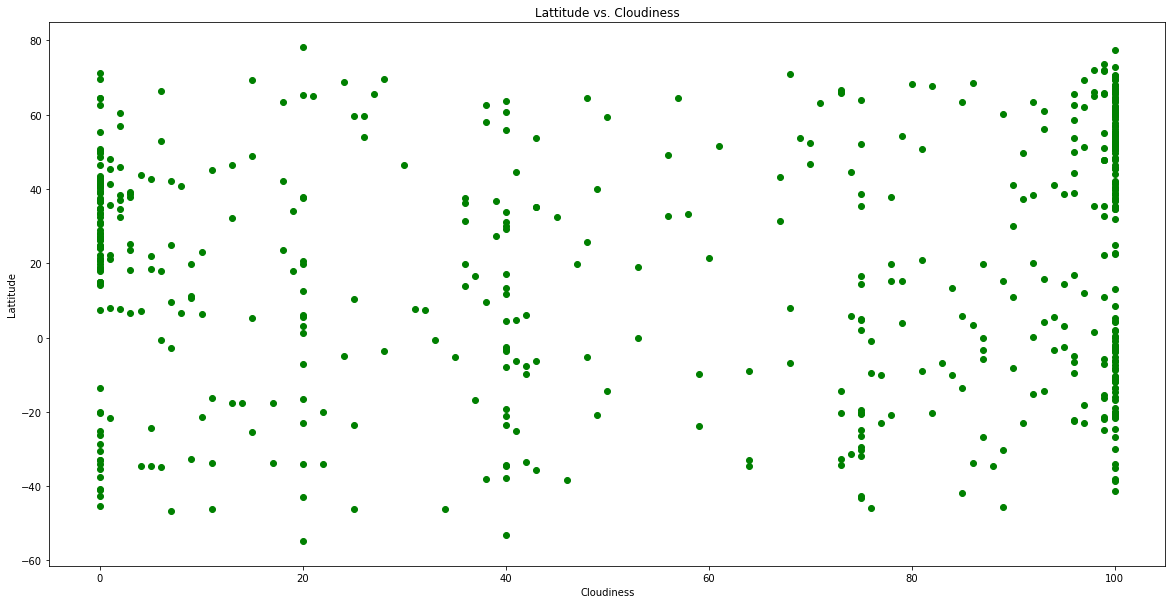

In [45]:

plt.figure(figsize=(20,10))
plt.scatter(weather_df["Cloudiness"], weather_df["Lattitude"], color= "green")
plt.xlabel("Cloudiness")
plt.ylabel("Lattitude")
plt.title("Lattitude vs. Cloudiness")
plt.show

Analysis- There is no correlation between cloudiness and lattitude. 

## Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(close=None, block=None)>

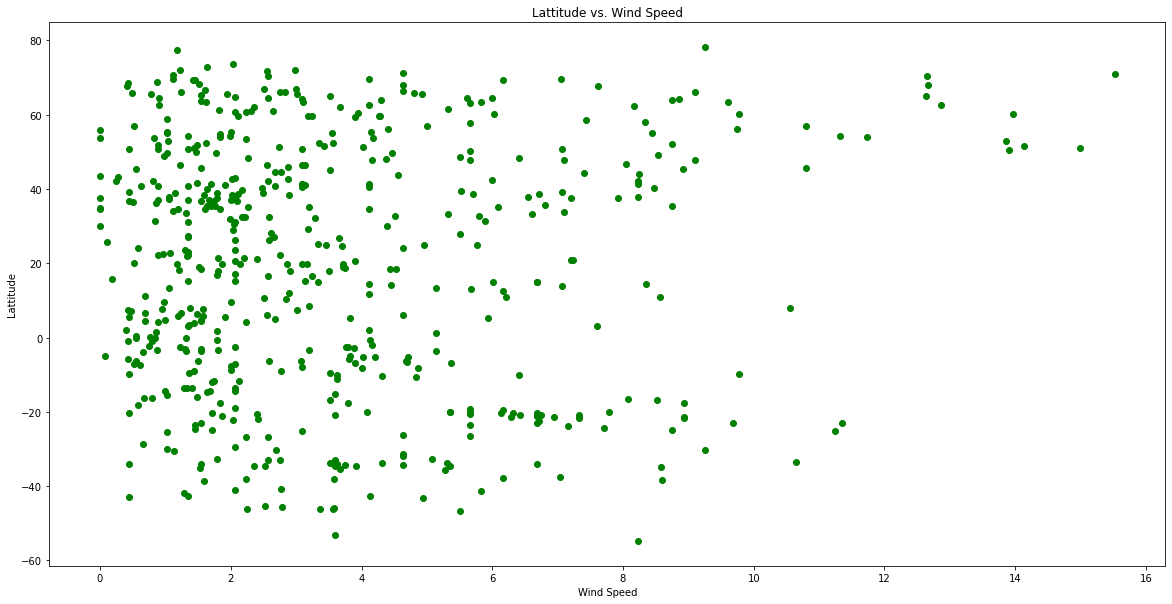

In [46]:

plt.figure(figsize=(20,10))
plt.scatter(weather_df["Wind Speed"], weather_df["Lattitude"], color= "green")
plt.xlabel("Wind Speed")
plt.ylabel("Lattitude")
plt.title("Lattitude vs. Wind Speed")
plt.show

Analysis- There is no correlation between wind speed and lattitude.

## Linear Regression

In [6]:
#North and South Dataframes
north= weather_df.loc[weather_df.Lattitude >= 0]
north.head()

,City,Country,Date,Lattitude,Longitude,Cloudiness,Humidity,Max Temperature,Wind Speed
2,Albany,US,1644118738,42.6001,-73.9662,5,76,-12.03,2.02
3,Freeport,US,1644118457,40.6576,-73.5832,0,63,-5.55,0.89
4,Hilo,US,1644118740,19.7297,-155.0900,20,77,24.85,3.09
9,Tuktoyaktuk,CA,1644118747,69.4541,-133.0374,0,75,-35.00,4.12
11,Lunenburg,CA,1644118750,44.3835,-64.3155,96,81,-9.00,7.41


In [7]:
south= weather_df.loc[weather_df.Lattitude < 0]
south.head()

,City,Country,Date,Lattitude,Longitude,Cloudiness,Humidity,Max Temperature,Wind Speed
0,Bredasdorp,ZA,1644118454,-34.5322,20.0403,64,95,20.16,2.36
1,Constitución,CL,1644118736,-35.3333,-72.4167,0,64,16.60,3.67
5,Punta Arenas,CL,1644118742,-53.1500,-70.9167,40,58,12.06,3.60
6,Bowen,AU,1644118743,-20.0167,148.2333,22,63,28.12,7.79
7,Cidreira,BR,1644118745,-30.1811,-50.2056,89,90,22.74,2.69


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

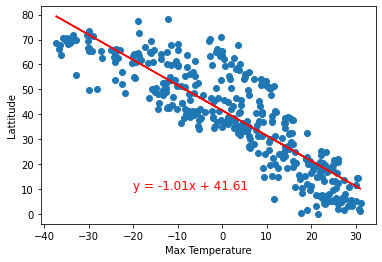

In [11]:
x_values = north["Max Temperature"]
y_values = north["Lattitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,10),fontsize=12,color="red")
plt.xlabel('Max Temperature')
plt.ylabel('Lattitude')
plt.show()

Analysis- As lattitude increases in the northern hemisphere, temperature decreases. As lattitude decreases, temperature increases.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

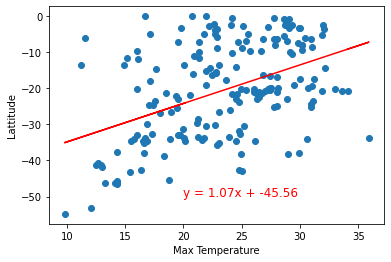

In [14]:
x_values = south["Max Temperature"]
y_values = south["Lattitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,-50),fontsize=12,color="red")
plt.xlabel('Max Temperature')
plt.ylabel('Lattitude')
plt.show()

Analysis- There is less correlation in the southern hemisphere from this random data set; however there is a slight trend towards temperature increasing as lattitude decreases.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

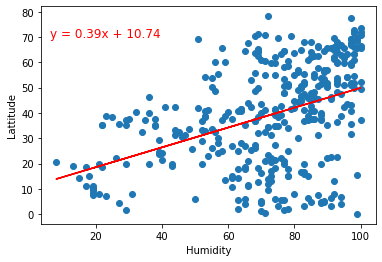

In [16]:
x_values = north["Humidity"]
y_values = north["Lattitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,70),fontsize=12,color="red")
plt.xlabel('Humidity')
plt.ylabel('Lattitude')
plt.show()

Analysis- There is not a strong correlation in this data, but there is a general trend for humidity to increase as lattitude increases.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

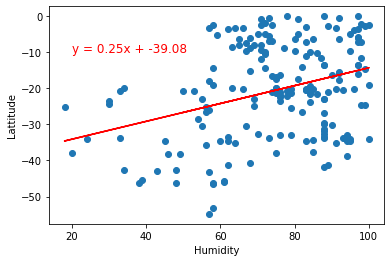

In [18]:
x_values = south["Humidity"]
y_values = south["Lattitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,-10),fontsize=12,color="red")
plt.xlabel('Humidity')
plt.ylabel('Lattitude')
plt.show()

Analysis- There is not a strong correlation between humidity and lattitude; however, there is a slight trend of humidity increasing as lattitude increases.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

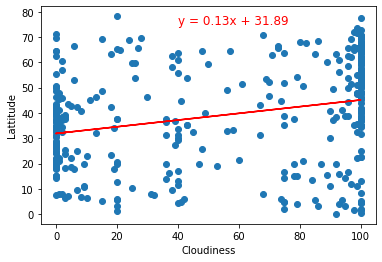

In [20]:
x_values = north["Cloudiness"]
y_values = north["Lattitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,75),fontsize=12,color="red")
plt.xlabel('Cloudiness')
plt.ylabel('Lattitude')
plt.show()

Analysis- There is no correlation in this data. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

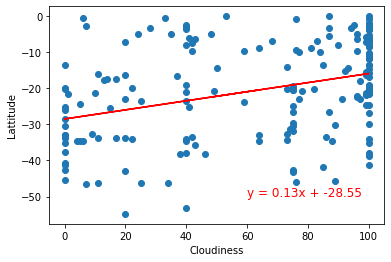

In [22]:
x_values = south["Cloudiness"]
y_values = south["Lattitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(60,-50),fontsize=12,color="red")
plt.xlabel('Cloudiness')
plt.ylabel('Lattitude')
plt.show()

Analysis- There is no correlation in this data. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

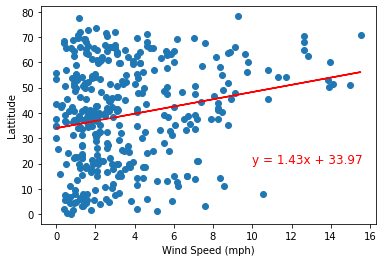

In [24]:
x_values = north["Wind Speed"]
y_values = north["Lattitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=12,color="red")
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Lattitude')
plt.show()

Analysis- There is correlation within this data. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

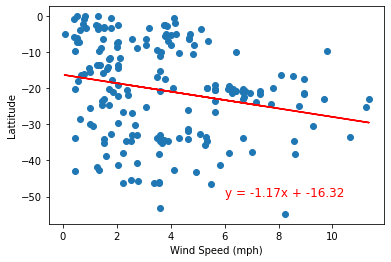

In [26]:
x_values = south["Wind Speed"]
y_values = south["Lattitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,-50),fontsize=12,color="red")
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Lattitude')
plt.show()

Analysis- There is no correlation in this data. 